In [7]:
# Install OpenCV and NumPy
!pip install -q opencv-python numpy matplotlib

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlretrieve

# 1. Download a sample image (e.g., a photo with a visible object to remove)
# Updated to use an image from picsum.photos for direct access
image_url = "https://picsum.photos/640/480/?random"
image_file = "sample_input.jpg"
urlretrieve(image_url, image_file)

# 2. Load the image
img = cv2.imread(image_file)
# Convert from BGR (OpenCV default) to RGB (Matplotlib/standard display)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 3. Create the Mask: Define a white area on a black background
# The white area (pixel value 255) tells OpenCV what to remove.
# We'll create a simple white rectangle mask for demonstration.
mask = np.zeros(img.shape[:2], dtype="uint8")

# Define the coordinates for the area to be masked (e.g., removing a region)
# (y_start, y_end), (x_start, x_end)
mask[100:300, 200:500] = 255

print("Image and Mask loaded successfully.")

Image and Mask loaded successfully.


In [11]:
# Inpaint the image using the Telea method
# The '3' is the radius of the neighborhood considered for inpainting.
result_telea = cv2.inpaint(img, mask, 3, cv2.INPAINT_TELEA)

# Convert the result back to RGB for display
result_telea_rgb = cv2.cvtColor(result_telea, cv2.COLOR_BGR2RGB)

print("Inpainting complete.")

Inpainting complete.


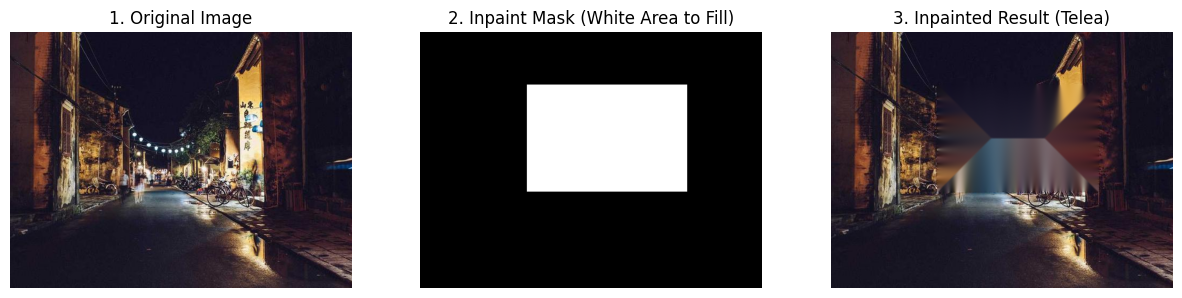

In [12]:
# Helper function to display images
def display_images(original, mask, inpainted):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Original Image
    axes[0].imshow(original)
    axes[0].set_title("1. Original Image")
    axes[0].axis('off')

    # Mask
    axes[1].imshow(mask, cmap='gray')
    axes[1].set_title("2. Inpaint Mask (White Area to Fill)")
    axes[1].axis('off')

    # Inpainted Result
    axes[2].imshow(inpainted)
    axes[2].set_title("3. Inpainted Result (Telea)")
    axes[2].axis('off')

    plt.show()

# Run the display function
display_images(img_rgb, mask, result_telea_rgb)

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. New Input: Change this to the name of your uploaded file
image_file = "wp4597559.jpg"

# 2. Load the image
img = cv2.imread(image_file)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Check if the image loaded correctly
if img is None:
    print(f"ERROR: Could not load image file: {image_file}. Check the file name.")
else:
    H, W, _ = img.shape
    print(f"New Image Dimensions: Height={H}, Width={W}")

    # 3. Create the Mask: DEFINE NEW COORDINATES for the area you want to remove
    mask = np.zeros(img.shape[:2], dtype="uint8")

    # Example: Masking the top-left corner
    # Adjust (y_start:y_end, x_start:x_end) based on your image
    mask[0:200, 0:300] = 255

    print("New Image and Mask loaded successfully.")

New Image Dimensions: Height=720, Width=1280
New Image and Mask loaded successfully.


In [14]:
# Inpaint the image using the Telea method
# The '3' is the radius of the neighborhood considered for inpainting.
result_telea = cv2.inpaint(img, mask, 3, cv2.INPAINT_TELEA)

# Convert the result back to RGB for display
result_telea_rgb = cv2.cvtColor(result_telea, cv2.COLOR_BGR2RGB)

print("Inpainting complete.")

Inpainting complete.


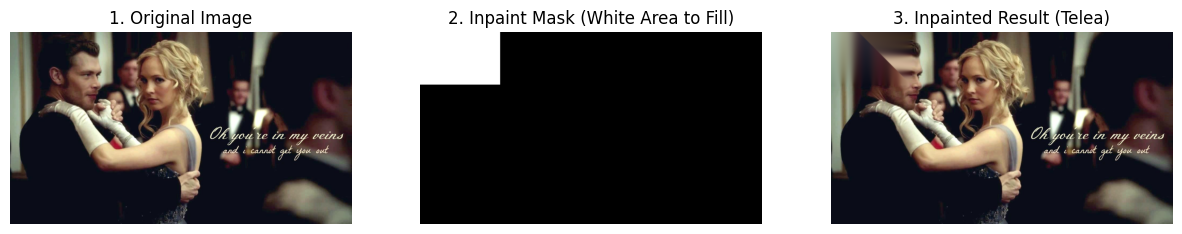

In [15]:
# Helper function to display images
def display_images(original, mask, inpainted):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Original Image
    axes[0].imshow(original)
    axes[0].set_title("1. Original Image")
    axes[0].axis('off')

    # Mask
    axes[1].imshow(mask, cmap='gray')
    axes[1].set_title("2. Inpaint Mask (White Area to Fill)")
    axes[1].axis('off')

    # Inpainted Result
    axes[2].imshow(inpainted)
    axes[2].set_title("3. Inpainted Result (Telea)")
    axes[2].axis('off')

    plt.show()

# Run the display function
display_images(img_rgb, mask, result_telea_rgb)